In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import datetime as dt
import warnings
import glob
import os

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#сет1
data1 = pd.read_csv(r'C:\Users\Desktop\Desktop\Desktop\сет1.csv',encoding='cp1251', sep= ',')

In [4]:
#сет2
os.chdir("/Users/Desktop/Desktop/Desktop/сет2")

In [5]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [6]:
data2 = pd.DataFrame()

for file in all_filenames:
    data = pd.read_csv(file, sep=',')
    data['filename'] = file
    data2 = pd.concat([data2, data])

In [7]:
data2['identity_value'] = data2['identity_value'].astype('string')
data2['identity_value'] = data2['identity_value'].str[1:].str[:-2]

In [8]:
data2['dt'] = pd.to_datetime(data2['dt'])
data2['year'] = data2['dt'].dt.year

In [9]:
data2['year'].unique()

array([2022, 2019, 2021, 2023, 2020, 2018], dtype=int64)

In [10]:
data1 = pd.DataFrame(data1)

# ______________________________________
# Cohort Analysis_data1
Отвечает на вопрос: как поведение клиентов меняется со временем и как выглядит модель поведения

Этапы:
1. Из столбца "дата" извлечь месяц и дату
2. Определить базовую дату - первая дата покупки клиентов
3. Определить период регистрации — рассчитать разницу между каждой транзакцией с первой датой покупки в месяцах.
4. Создать датафрейм когортного анализа

In [12]:
# изменение типов данных столбец дата
data1['date'] = data1['date'].astype(np.str).str.slice(0,10) 
data1['date'] = pd.to_datetime(data1['date'])

In [13]:
# получение месяца и месяц+дата
def get_month(date):
    
        return dt.datetime(date.year,date.month,1)

def get_date(data1, column):
    
        year = data1[column].dt.year
        month = data1[column].dt.month
        return year, month

In [14]:
# Получение первого дня месяца, в который осуществлена заправка
data1["BillMonth"] = data1["date"].apply(get_month)

In [15]:
# Получение даты первой заправки клиента
group = data1.groupby("phone")["BillMonth"]
data1["CohortMonth"] = group.transform("min")

In [18]:
# Считаем разницу в месяцах и годах
BillYear, BillMonth = get_date(data1, "BillMonth")
CohortYear, CohortMonth = get_date(data1, "CohortMonth")

DiffYear = BillYear - CohortYear
DiffMonth = BillMonth - CohortMonth

data1["Month_Index"] = DiffYear * 12 + DiffMonth + 1

## Retention by Monthly Cohorts

In [19]:
group = data1.groupby(["CohortMonth", "Month_Index"])
cohort_data = group["phone"].apply(pd.Series.nunique).reset_index() # считаем уникальные id клиентов

In [20]:
cohort_data

,CohortMonth,Month_Index,phone
0,2019-07-01,1,1
1,2019-07-01,3,1
2,2019-07-01,4,1
3,2019-07-01,9,1
4,2019-07-01,10,1
...,...,...,...
903,2022-11-01,2,4513
904,2022-11-01,3,3628
905,2022-12-01,1,7715
906,2022-12-01,2,4960


In [21]:
# сделаем сводную таблицу
cohort_counts = cohort_data.pivot(index = "CohortMonth", columns = "Month_Index", values= "phone")
cohort_counts

Month_Index,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,41,42
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2019-07-01,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,26.0,15.0,16.0,9.0,10.0,11.0,9.0,11.0,14.0,16.0,...,7.0,7.0,8.0,10.0,6.0,8.0,9.0,7.0,8.0,8.0
2019-09-01,152.0,131.0,122.0,110.0,110.0,102.0,104.0,101.0,102.0,109.0,...,73.0,77.0,78.0,81.0,84.0,83.0,71.0,74.0,66.0,NaN
2019-10-01,629.0,482.0,467.0,440.0,445.0,433.0,406.0,416.0,461.0,471.0,...,331.0,352.0,364.0,374.0,364.0,345.0,335.0,300.0,NaN,NaN
2019-11-01,1329.0,1046.0,904.0,976.0,730.0,711.0,780.0,838.0,994.0,990.0,...,860.0,882.0,886.0,878.0,856.0,836.0,744.0,NaN,NaN,NaN
2019-12-01,1339.0,957.0,918.0,847.0,452.0,476.0,518.0,873.0,1001.0,1019.0,...,881.0,900.0,895.0,902.0,897.0,826.0,NaN,NaN,NaN,NaN
2020-01-01,651.0,497.0,381.0,328.0,327.0,341.0,433.0,450.0,473.0,464.0,...,416.0,413.0,409.0,423.0,370.0,NaN,NaN,NaN,NaN,NaN
2020-02-01,1270.0,700.0,691.0,720.0,722.0,838.0,834.0,877.0,876.0,872.0,...,780.0,775.0,795.0,707.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-01,2256.0,1437.0,1618.0,1627.0,1681.0,1662.0,1642.0,1632.0,1588.0,1565.0,...,1176.0,1275.0,1145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Первый столбец берем за базу в 100% 
cohort_sizes = cohort_counts.iloc[:, 0]

retention = cohort_counts.divide(cohort_sizes, axis = 0) * 100
retention.round(2)

Month_Index,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,41,42
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2019-07-01,100.0,NaN,100.00,100.00,NaN,NaN,NaN,NaN,100.00,100.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,100.0,57.69,61.54,34.62,38.46,42.31,34.62,42.31,53.85,61.54,...,26.92,26.92,30.77,38.46,23.08,30.77,34.62,26.92,30.77,30.77
2019-09-01,100.0,86.18,80.26,72.37,72.37,67.11,68.42,66.45,67.11,71.71,...,48.03,50.66,51.32,53.29,55.26,54.61,46.71,48.68,43.42,NaN
2019-10-01,100.0,76.63,74.24,69.95,70.75,68.84,64.55,66.14,73.29,74.88,...,52.62,55.96,57.87,59.46,57.87,54.85,53.26,47.69,NaN,NaN
2019-11-01,100.0,78.71,68.02,73.44,54.93,53.50,58.69,63.05,74.79,74.49,...,64.71,66.37,66.67,66.06,64.41,62.90,55.98,NaN,NaN,NaN
2019-12-01,100.0,71.47,68.56,63.26,33.76,35.55,38.69,65.20,74.76,76.10,...,65.80,67.21,66.84,67.36,66.99,61.69,NaN,NaN,NaN,NaN
2020-01-01,100.0,76.34,58.53,50.38,50.23,52.38,66.51,69.12,72.66,71.27,...,63.90,63.44,62.83,64.98,56.84,NaN,NaN,NaN,NaN,NaN
2020-02-01,100.0,55.12,54.41,56.69,56.85,65.98,65.67,69.06,68.98,68.66,...,61.42,61.02,62.60,55.67,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-01,100.0,63.70,71.72,72.12,74.51,73.67,72.78,72.34,70.39,69.37,...,52.13,56.52,50.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#количество клиентов по кагортам
cohort_sizes

CohortMonth
2019-07-01       1.0
2019-08-01      26.0
2019-09-01     152.0
2019-10-01     629.0
2019-11-01    1329.0
2019-12-01    1339.0
2020-01-01     651.0
2020-02-01    1270.0
2020-03-01    2256.0
2020-04-01    4007.0
2020-05-01    3842.0
2020-06-01    4563.0
2020-07-01    3363.0
2020-08-01    3532.0
2020-09-01    5007.0
2020-10-01    5500.0
2020-11-01    7081.0
2020-12-01    7194.0
2021-01-01    9032.0
2021-02-01    8287.0
2021-03-01    8632.0
2021-04-01    7141.0
2021-05-01    6272.0
2021-06-01    5297.0
2021-07-01    5687.0
2021-08-01    4556.0
2021-09-01    5048.0
2021-10-01    5143.0
2021-11-01    4822.0
2021-12-01    5913.0
2022-01-01    4988.0
2022-02-01    4398.0
2022-03-01    4471.0
2022-04-01    4909.0
2022-05-01    5862.0
2022-06-01    5727.0
2022-07-01    7634.0
2022-08-01    6393.0
2022-09-01    6457.0
2022-10-01    6803.0
2022-11-01    6375.0
2022-12-01    7715.0
2023-01-01    5092.0
Name: 1, dtype: float64

In [24]:
month_list = ["Jul 2019", "Aug 2019", 
    "Sep 2019", "Oct 2019", "Nov 2019", "Dec 2019",
              "Jan 2020", "Feb 2020", "Mar 2020", "Apr 2020", "May 2020", "Jun 2020", "Jul 2020", "Aug 2020", 
    "Sep 2020", "Oct 2020", "Nov 2020", "Dec 2020",
               "Jan 2021", "Feb 2021", "Mar 2021", "Apr 2021", "May 2021", "Jun 2021", "Jul 2021", "Aug 2021", 
    "Sep 2021", "Oct 2021", "Nov 2021", "Dec 2021",
            "Jan 2022", "Feb 2022", "Mar 2022", "Apr 2022", "May 2022", "Jun 2022", "Jul 2022", "Aug 2022", 
    "Sep 2022", "Oct 2022", "Nov 2022", "Dec 2022", "Jan 2023"]

Text(0.5, 1.0, 'Retention by Monthly Cohorts from Jul 2019 to Jan 2023')

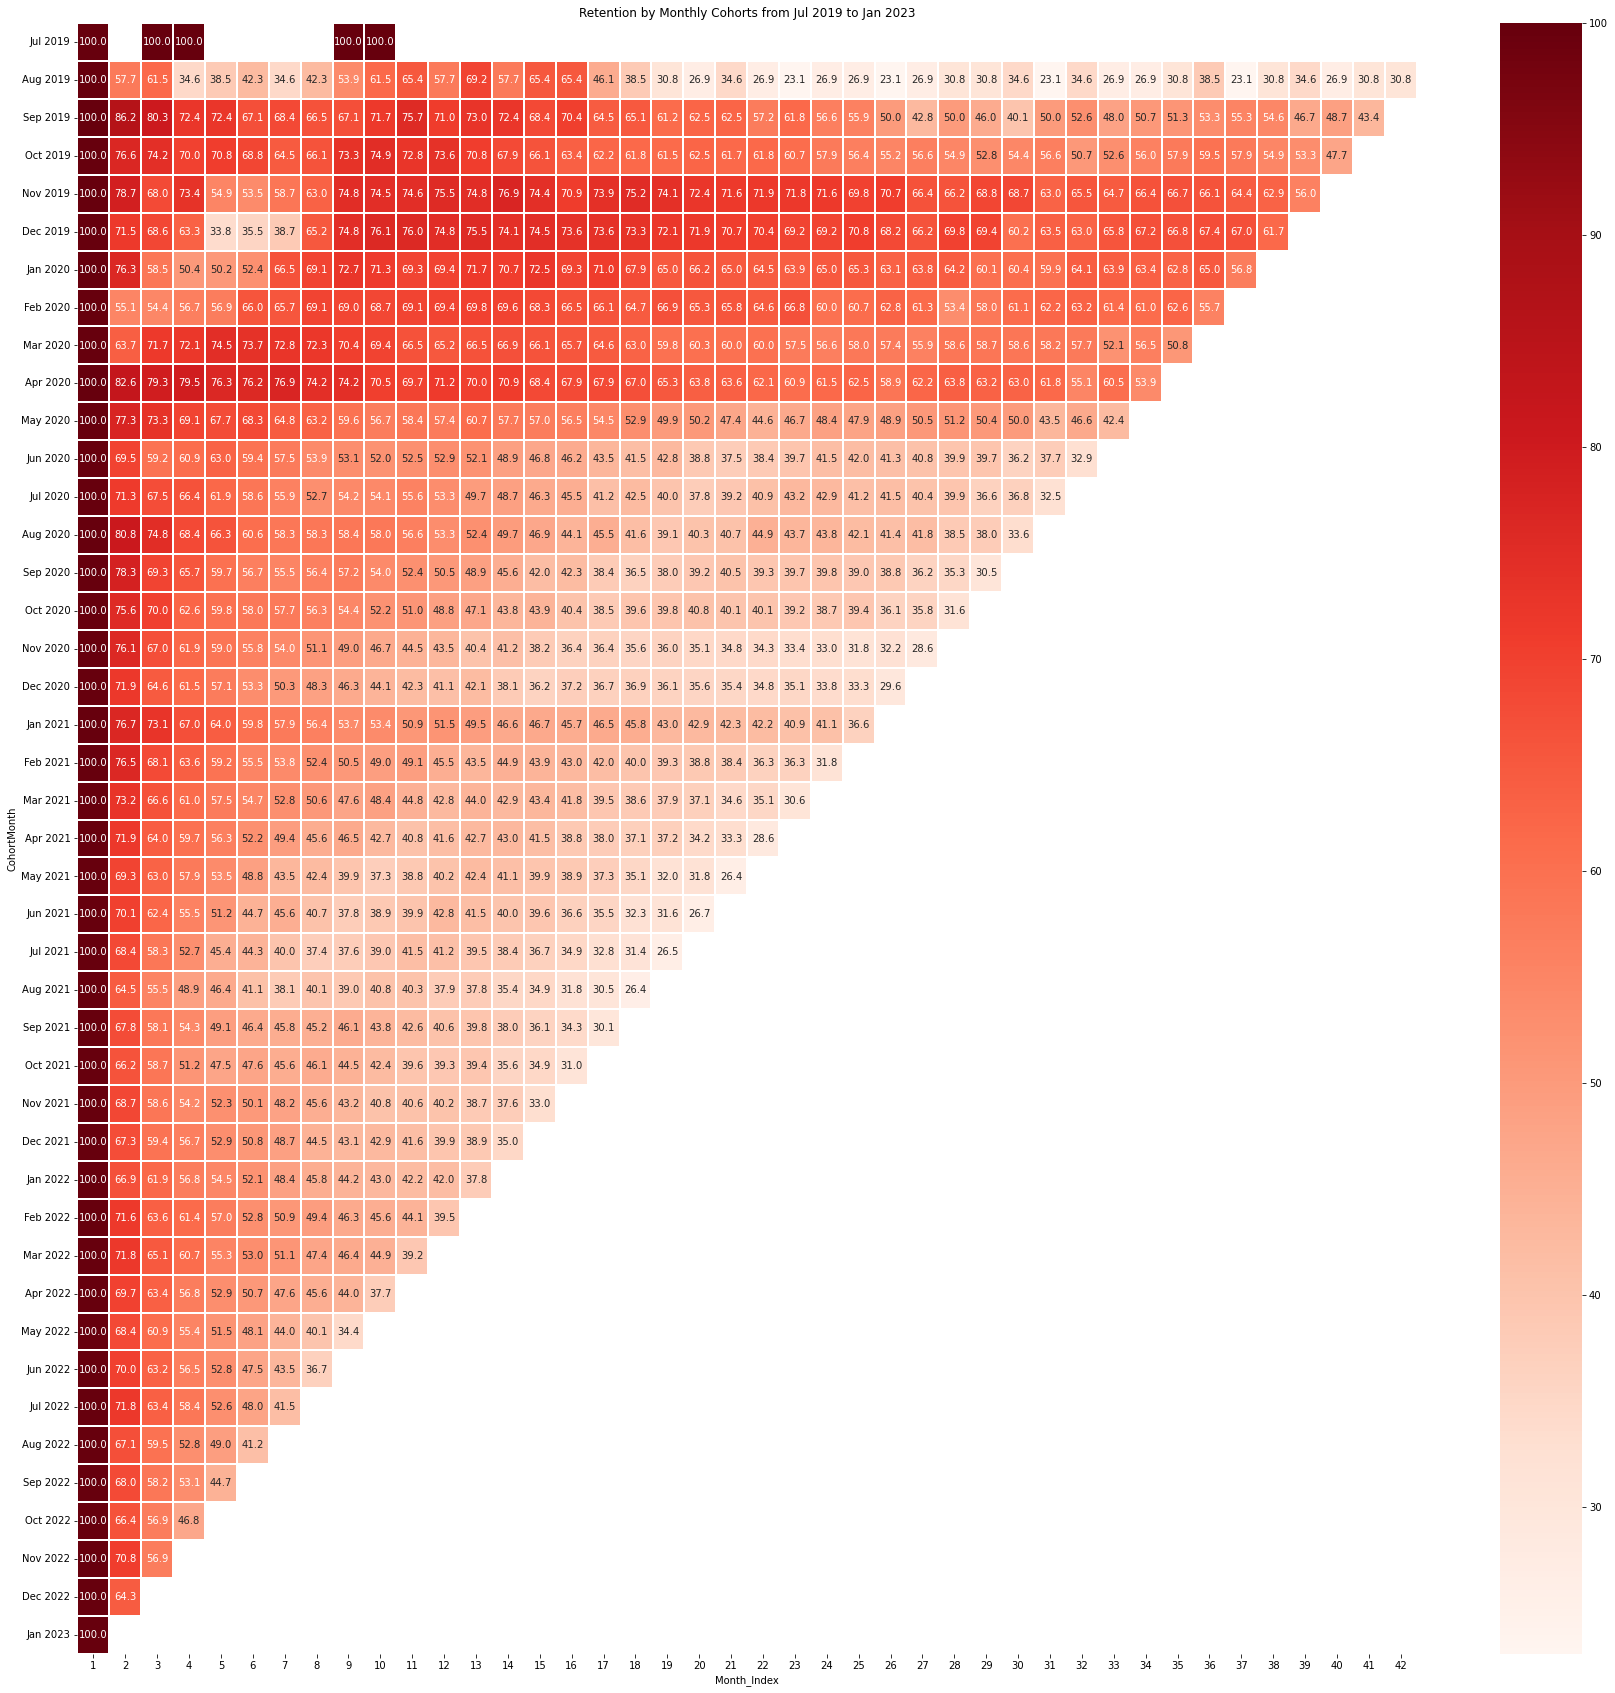

In [25]:
plt.figure(figsize = (30,30))
sns.heatmap(data = retention.round(2), annot = True, cmap = "Reds", fmt = ".1f", linewidths = 0.2, yticklabels = month_list)
plt.title("Retention by Monthly Cohorts from Jul 2019 to Jan 2023")

#plt.savefig('Retention_Cohorts.jpeg', bbox_inches='tight', pad_inches=0.1, format='jpeg',dpi=300)

# Как читать хитмэп: первый столбец [месяц+год] представляет собой когорты - то есть клиентов, 
#кто совершил свою первую заправку в этот месяц+год. 
# В строке соответсвующей когорты отражено поведения клиентов данной когорты в последующие месяцы.

# Как считаются показатели в ячейках: Количество клиентов в соответсвующей когорте в каждый последующий месяц
#делится на количество людей в когорте. 

# Например: 
#- в Октябре 2019 (Когорта 1) заправились 1000 клиентов - для нас это знаменатель
#- в Ноябре 2019 из клиентов Кагорты 1 заправились 800 клиентов - для нас это числитель.
# Т.О RETENTION RATE = 80

# ______________________________________

# Cohort Analysis_data2
Отвечает на вопрос: как поведение клиентов меняется со временем и как выглядит модель поведения

In [26]:
# изменяю формат столбца с датами
data2['dt'] = pd.to_datetime(data2['dt'])

In [27]:
# изменение типов данных столбец дата
data2['dt'] = data2['dt'].astype(np.str).str.slice(0,10) 
data2['dt'] = pd.to_datetime(data2['dt'])

In [28]:
# Получение первого дня месяца, в который осуществлена заправка
data2["BillMonth"] = data2['dt'].apply(get_month)

In [29]:
# Получение даты первой заправки клиента
group = data2.groupby("identity_value")["BillMonth"]
data2["CohortMonth"] = group.transform("min")

In [32]:
# Считаем разницу в месяцах и годах
BillYear, BillMonth = get_date(data2, "BillMonth")
CohortYear, CohortMonth = get_date(data2, "CohortMonth")

DiffYear = BillYear - CohortYear
DiffMonth = BillMonth - CohortMonth

data2["Month_Index"] = DiffYear * 12 + DiffMonth + 1

## Retention by Monthly Cohorts

In [33]:
group = data2.groupby(["CohortMonth", "Month_Index"])
cohort_data_data2 = group["identity_value"].apply(pd.Series.nunique).reset_index() # считаем уникальные id клиентов

In [34]:
cohort_data_data2['Month_Index'] = cohort_data_data2['Month_Index'].astype('int')

In [35]:
month_list_data2 = ["Nov 2018", "Dec 2018", "Jan 2019", "Feb 2019", "Mar 2019", "Apr 2019", "May 2019", "Jun 2019",
                    "Jul 2019", "Aug 2019", 
    "Sep 2019", "Oct 2019", "Nov 2019", "Dec 2019",
              "Jan 2020", "Feb 2020", "Mar 2020", "Apr 2020", "May 2020", "Jun 2020", "Jul 2020", "Aug 2020", 
    "Sep 2020", "Oct 2020", "Nov 2020", "Dec 2020",
               "Jan 2021", "Feb 2021", "Mar 2021", "Apr 2021", "May 2021", "Jun 2021", "Jul 2021", "Aug 2021", 
    "Sep 2021", "Oct 2021", "Nov 2021", "Dec 2021",
            "Jan 2022", "Feb 2022", "Mar 2022", "Apr 2022", "May 2022", "Jun 2022", "Jul 2022", "Aug 2022", 
    "Sep 2022", "Oct 2022", "Nov 2022", "Dec 2022", "Jan 2023"]

In [36]:
# сделаем сводную таблицу
cohort_counts_data2 = cohort_data_data2.pivot(index = "CohortMonth", columns = "Month_Index", values= "identity_value")
cohort_counts_data2

Month_Index,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2018-11-01,7.0,4.0,5.0,3.0,3.0,4.0,5.0,5.0,4.0,4.0,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2018-12-01,1139.0,557.0,457.0,468.0,425.0,362.0,367.0,308.0,265.0,227.0,...,81.0,81.0,87.0,90.0,78.0,81.0,79.0,80.0,99.0,91.0
2019-01-01,1661.0,671.0,576.0,493.0,431.0,407.0,321.0,301.0,255.0,218.0,...,96.0,96.0,94.0,93.0,93.0,83.0,96.0,94.0,94.0,NaN
2019-02-01,1059.0,694.0,551.0,494.0,402.0,344.0,298.0,253.0,205.0,198.0,...,71.0,62.0,65.0,56.0,64.0,68.0,68.0,68.0,NaN,NaN
2019-03-01,4285.0,2828.0,2338.0,1894.0,1566.0,1458.0,1309.0,1159.0,1019.0,967.0,...,323.0,311.0,305.0,287.0,286.0,333.0,308.0,NaN,NaN,NaN
2019-04-01,3502.0,2193.0,1722.0,1402.0,1274.0,1139.0,1013.0,879.0,848.0,845.0,...,276.0,239.0,249.0,259.0,283.0,239.0,NaN,NaN,NaN,NaN
2019-05-01,2375.0,1324.0,980.0,831.0,738.0,645.0,563.0,513.0,531.0,546.0,...,159.0,163.0,159.0,174.0,151.0,NaN,NaN,NaN,NaN,NaN
2019-06-01,2614.0,1636.0,1168.0,977.0,857.0,711.0,678.0,643.0,640.0,658.0,...,170.0,168.0,189.0,174.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01,2465.0,1435.0,983.0,831.0,718.0,642.0,630.0,600.0,569.0,422.0,...,160.0,163.0,149.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Первый столбец берем за базу в 100% 
cohort_sizes_data2 = cohort_counts_data2.iloc[:, 0]

# Количество клиентов в соответсвующей когорте в динамике помесячно делится на количество людей в когорте
retention_data2 = cohort_counts_data2.divide(cohort_sizes_data2, axis = 0) * 100
retention_data2.round(2)

Month_Index,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2018-11-01,100.0,57.14,71.43,42.86,42.86,57.14,71.43,71.43,57.14,57.14,...,NaN,14.29,14.29,NaN,NaN,NaN,NaN,NaN,NaN,14.29
2018-12-01,100.0,48.90,40.12,41.09,37.31,31.78,32.22,27.04,23.27,19.93,...,7.11,7.11,7.64,7.90,6.85,7.11,6.94,7.02,8.69,7.99
2019-01-01,100.0,40.40,34.68,29.68,25.95,24.50,19.33,18.12,15.35,13.12,...,5.78,5.78,5.66,5.60,5.60,5.00,5.78,5.66,5.66,NaN
2019-02-01,100.0,65.53,52.03,46.65,37.96,32.48,28.14,23.89,19.36,18.70,...,6.70,5.85,6.14,5.29,6.04,6.42,6.42,6.42,NaN,NaN
2019-03-01,100.0,66.00,54.56,44.20,36.55,34.03,30.55,27.05,23.78,22.57,...,7.54,7.26,7.12,6.70,6.67,7.77,7.19,NaN,NaN,NaN
2019-04-01,100.0,62.62,49.17,40.03,36.38,32.52,28.93,25.10,24.21,24.13,...,7.88,6.82,7.11,7.40,8.08,6.82,NaN,NaN,NaN,NaN
2019-05-01,100.0,55.75,41.26,34.99,31.07,27.16,23.71,21.60,22.36,22.99,...,6.69,6.86,6.69,7.33,6.36,NaN,NaN,NaN,NaN,NaN
2019-06-01,100.0,62.59,44.68,37.38,32.79,27.20,25.94,24.60,24.48,25.17,...,6.50,6.43,7.23,6.66,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01,100.0,58.22,39.88,33.71,29.13,26.04,25.56,24.34,23.08,17.12,...,6.49,6.61,6.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
#количество клиентов по кагортам
cohort_counts_data2

Month_Index,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2018-11-01,7.0,4.0,5.0,3.0,3.0,4.0,5.0,5.0,4.0,4.0,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2018-12-01,1139.0,557.0,457.0,468.0,425.0,362.0,367.0,308.0,265.0,227.0,...,81.0,81.0,87.0,90.0,78.0,81.0,79.0,80.0,99.0,91.0
2019-01-01,1661.0,671.0,576.0,493.0,431.0,407.0,321.0,301.0,255.0,218.0,...,96.0,96.0,94.0,93.0,93.0,83.0,96.0,94.0,94.0,NaN
2019-02-01,1059.0,694.0,551.0,494.0,402.0,344.0,298.0,253.0,205.0,198.0,...,71.0,62.0,65.0,56.0,64.0,68.0,68.0,68.0,NaN,NaN
2019-03-01,4285.0,2828.0,2338.0,1894.0,1566.0,1458.0,1309.0,1159.0,1019.0,967.0,...,323.0,311.0,305.0,287.0,286.0,333.0,308.0,NaN,NaN,NaN
2019-04-01,3502.0,2193.0,1722.0,1402.0,1274.0,1139.0,1013.0,879.0,848.0,845.0,...,276.0,239.0,249.0,259.0,283.0,239.0,NaN,NaN,NaN,NaN
2019-05-01,2375.0,1324.0,980.0,831.0,738.0,645.0,563.0,513.0,531.0,546.0,...,159.0,163.0,159.0,174.0,151.0,NaN,NaN,NaN,NaN,NaN
2019-06-01,2614.0,1636.0,1168.0,977.0,857.0,711.0,678.0,643.0,640.0,658.0,...,170.0,168.0,189.0,174.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01,2465.0,1435.0,983.0,831.0,718.0,642.0,630.0,600.0,569.0,422.0,...,160.0,163.0,149.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Retention by Monthly Cohorts from Jul 2019 to Jan 2023')

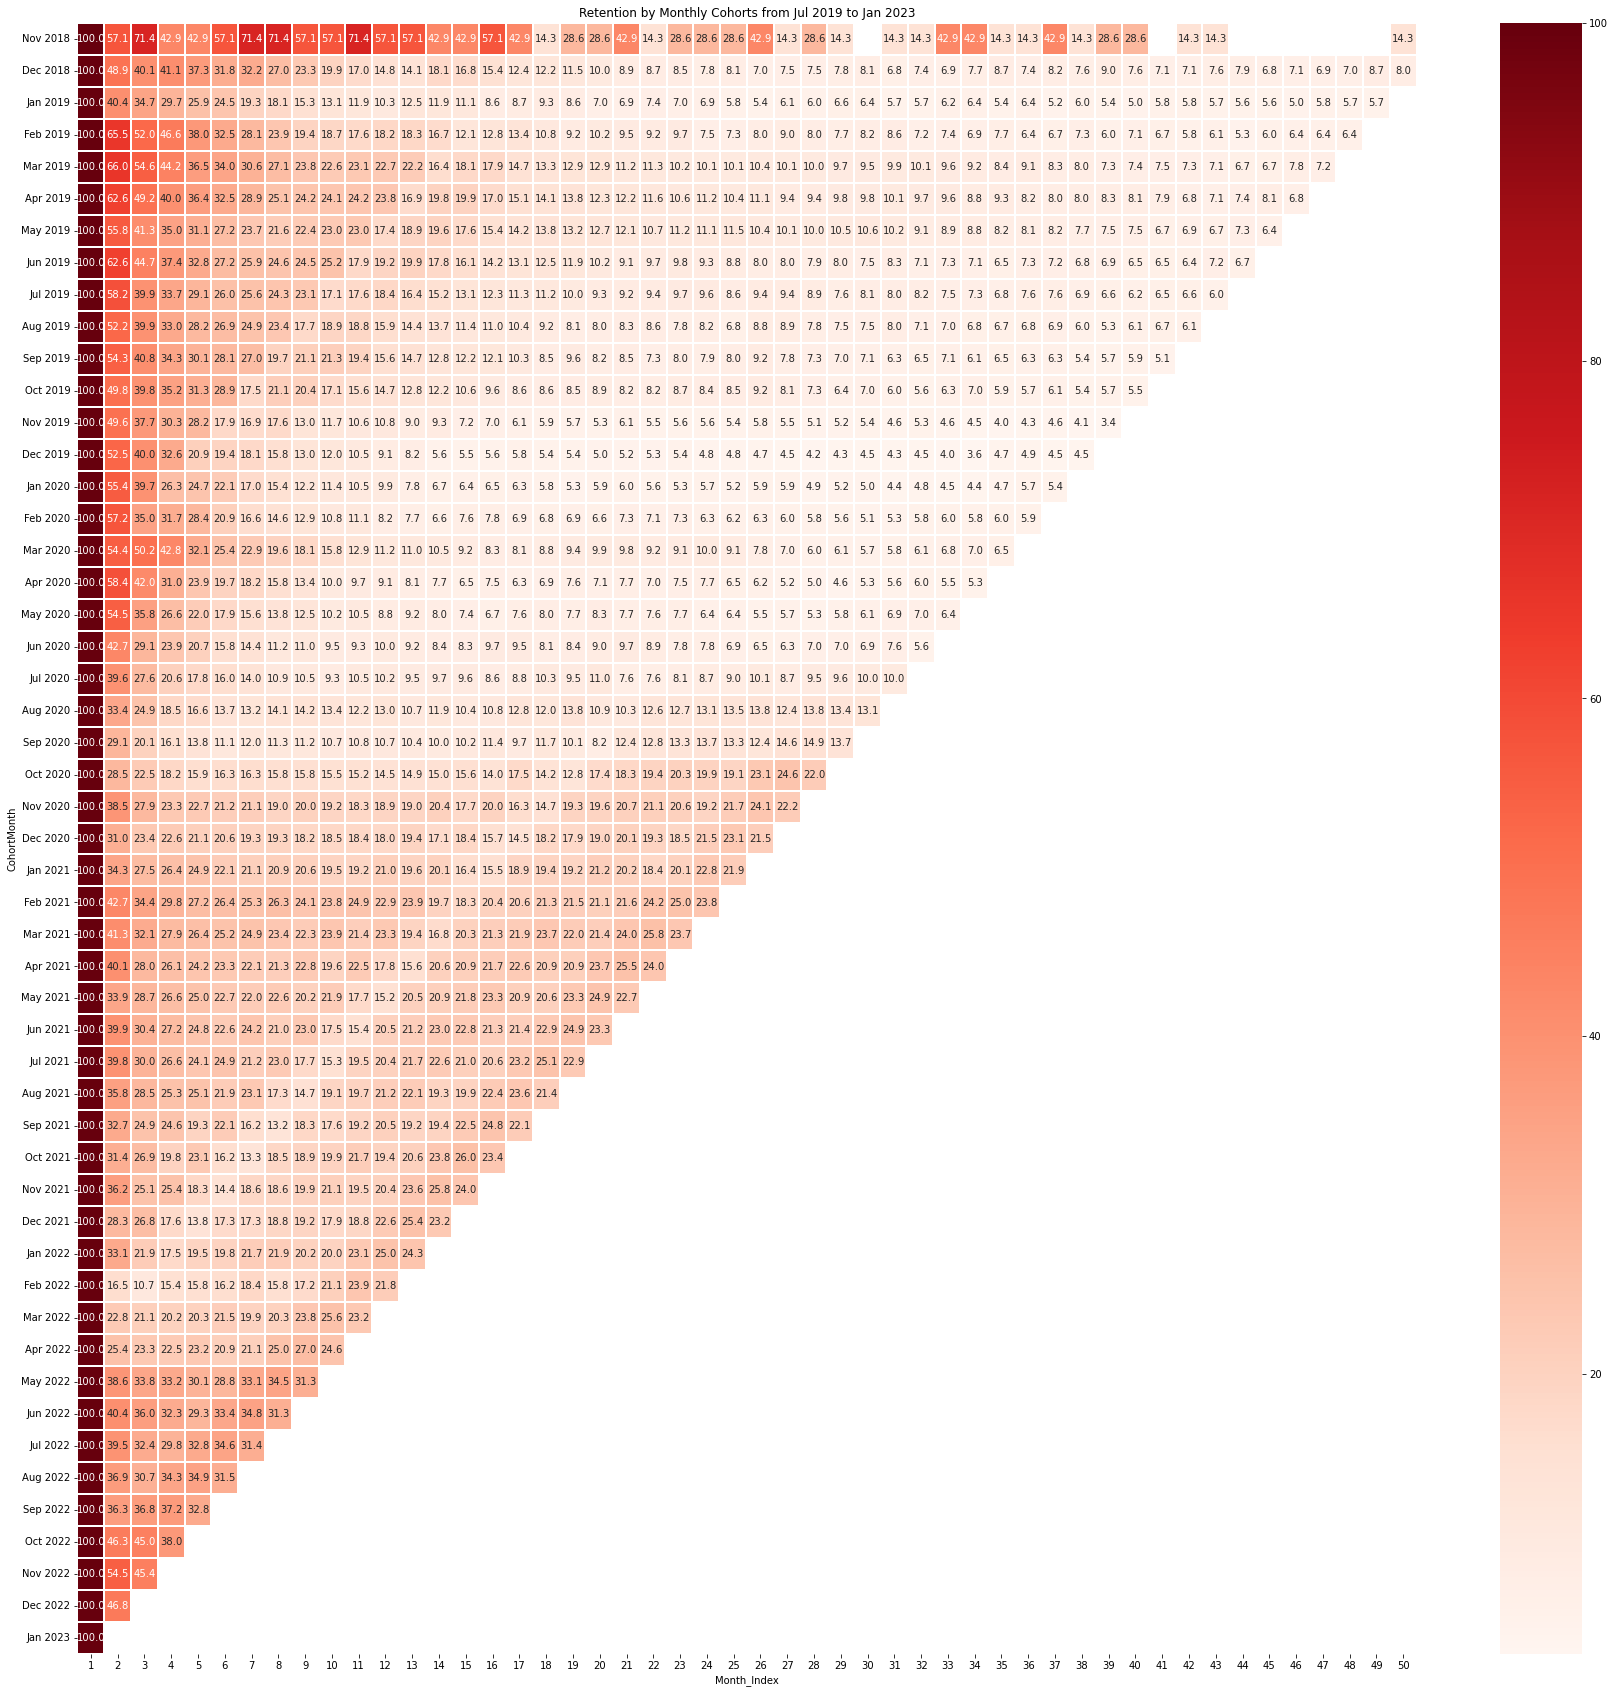

In [40]:
plt.figure(figsize = (30,30))
sns.heatmap(data = retention_data2.round(2), annot = True, cmap = "Reds", fmt = ".1f", linewidths = 0.2, yticklabels = month_list_data2)
plt.title("Retention by Monthly Cohorts from Jul 2019 to Jan 2023")

#plt.savefig('Retention_Cohorts.jpeg', bbox_inches='tight', pad_inches=0.1, format='jpeg', dpi=300)

# Как читать хитмэп: первый столбец [месяц+год] представляет собой когорты - то есть клиентов, 
#кто совершил свою первую заправку в этот месяц+год. 
# В строке соответсвующей когорты отражено поведения клиентов данной когорты в последующие месяцы.

# Как считаются показатели в ячейках: Количество клиентов в соответсвующей когорте в каждый последующий месяц
#делится на количество людей в когорте. 

# Например: 
#- в Октябре 2019 (Когорта 1) заправились 1000 клиентов - для нас это знаменатель
#- в Ноябре 2019 из клиентов Кагорты 1 заправились 800 клиентов - для нас это числитель.
# Т.О RETENTION RATE = 80